# Plotting from geotables

In this notebook, we'll walk through how to easily plot with `DataFrame`s that contain a `geometry` column specified in the `PySAL` shapes (**TIP**: you can get these tables with our pandas I/O interface).

In [1]:
%matplotlib inline

In [2]:
import pysal as ps
import numpy as np
from pysal.contrib import pdio
from pysal.contrib.viz import mapping as maps
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.colors as clrs

from bokeh.models import HoverTool
from bokeh.palettes import Viridis6
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

output_notebook()

`PySAL` comes with a bunch of example datasets:

In [3]:
ps.examples.available()

['10740',
 'arcgis',
 'baltim',
 'book',
 'burkitt',
 'calemp',
 'chicago',
 'columbus',
 'desmith',
 'geodanet',
 'juvenile',
 'Line',
 'mexico',
 'nat',
 'networks',
 'newHaven',
 'Point',
 'Polygon',
 'sacramento2',
 'sids2',
 'snow_maps',
 'south',
 'stl',
 'street_net_pts',
 'taz',
 'us_income',
 'virginia',
 'wmat']

Let's pick `NAT`, which is a relatively large dataset containing all the contiguous counties in the US. To read it in in one shot, use our `read_files` method from `pdio`:

In [35]:
db = pdio.read_files(ps.examples.get_path('NAT.shp'))
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 70 columns):
NAME          3085 non-null object
STATE_NAME    3085 non-null object
STATE_FIPS    3085 non-null object
CNTY_FIPS     3085 non-null object
FIPS          3085 non-null object
STFIPS        3085 non-null int64
COFIPS        3085 non-null int64
FIPSNO        3085 non-null int64
SOUTH         3085 non-null int64
HR60          3085 non-null float64
HR70          3085 non-null float64
HR80          3085 non-null float64
HR90          3085 non-null float64
HC60          3085 non-null float64
HC70          3085 non-null float64
HC80          3085 non-null float64
HC90          3085 non-null float64
PO60          3085 non-null int64
PO70          3085 non-null int64
PO80          3085 non-null int64
PO90          3085 non-null int64
RD60          3085 non-null float64
RD70          3085 non-null float64
RD80          3085 non-null float64
RD90          3085 non-null float64
PS60          

## `geoplot`

The easiest way to make a map is to call `geoplot`:

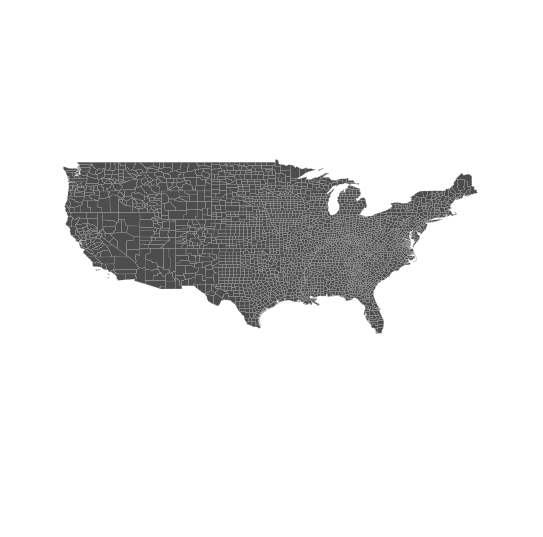

In [36]:
maps.geoplot(db)

This uses the default `matplotlib` backend, but you could also use the `bokeh` backend to create an interactive map:

In [39]:
maps.geoplot(db, backend='bk')

## GeoColumn plotting

If you want or need more control and flexibility, you can access directly the plotting machinery for a single series of geometries.

### `matplotlib` interface

In [5]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
pal = sns.xkcd_palette(colors)

colors = np.array(pal)[np.random.random_integers(0, high=len(pal)-1, size=db.shape[0])]
colors = pd.Series(colors.tolist(), index=db.index)

In [42]:
import types
kinds = (types.ClassType, type)
classifier  = {k.lower():v for k,v in ps.esda.mapclassify.__dict__.items() \
        if isinstance(v, kinds)}
classifier

{'box_plot': pysal.esda.mapclassify.Box_Plot,
 'equal_interval': pysal.esda.mapclassify.Equal_Interval,
 'fisher_jenks': pysal.esda.mapclassify.Fisher_Jenks,
 'fisher_jenks_sampled': pysal.esda.mapclassify.Fisher_Jenks_Sampled,
 'headtail_breaks': pysal.esda.mapclassify.HeadTail_Breaks,
 'jenks_caspall': pysal.esda.mapclassify.Jenks_Caspall,
 'jenks_caspall_forced': pysal.esda.mapclassify.Jenks_Caspall_Forced,
 'jenks_caspall_sampled': pysal.esda.mapclassify.Jenks_Caspall_Sampled,
 'k_classifiers': pysal.esda.mapclassify.K_classifiers,
 'map_classifier': pysal.esda.mapclassify.Map_Classifier,
 'max_p_classifier': pysal.esda.mapclassify.Max_P_Classifier,
 'maximum_breaks': pysal.esda.mapclassify.Maximum_Breaks,
 'natural_breaks': pysal.esda.mapclassify.Natural_Breaks,
 'percentiles': pysal.esda.mapclassify.Percentiles,
 'quantiles': pysal.esda.mapclassify.Quantiles,
 'std_mean': pysal.esda.mapclassify.Std_Mean,
 'user_defined': pysal.esda.mapclassify.User_Defined}

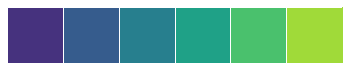

In [6]:
pltt = map(clrs.rgb2hex, sns.color_palette('viridis', 6))
sns.palplot(pltt)

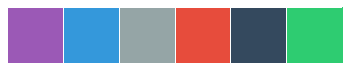

In [9]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

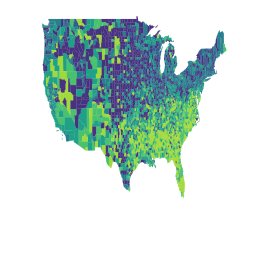

CPU times: user 444 ms, sys: 11.6 ms, total: 455 ms
Wall time: 452 ms


In [34]:
%%time
reload(maps);

f, ax = plt.subplots(1, figsize=(4, 4))
maps.plot_geocol_mpl(db.loc[:, 'geometry'], color=fj, ax=ax)
#maps.geoplot(db, ax=ax)
plt.show()

## `bokeh` interface

In [16]:
fj.loc[:100].head()

0    #46327e
1    #46327e
2    #277f8e
3    #277f8e
4    #46327e
dtype: object

In [170]:
db.loc[:100, :].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 70 columns):
NAME          101 non-null object
STATE_NAME    101 non-null object
STATE_FIPS    101 non-null object
CNTY_FIPS     101 non-null object
FIPS          101 non-null object
STFIPS        101 non-null int64
COFIPS        101 non-null int64
FIPSNO        101 non-null int64
SOUTH         101 non-null int64
HR60          101 non-null float64
HR70          101 non-null float64
HR80          101 non-null float64
HR90          101 non-null float64
HC60          101 non-null float64
HC70          101 non-null float64
HC80          101 non-null float64
HC90          101 non-null float64
PO60          101 non-null int64
PO70          101 non-null int64
PO80          101 non-null int64
PO90          101 non-null int64
RD60          101 non-null float64
RD70          101 non-null float64
RD80          101 non-null float64
RD90          101 non-null float64
PS60          101 non-null float64
PS70  

In [17]:
reload(maps)

maps.plot_geocol_bk(db.loc[:100, 'geometry'], color=fj.loc[:100], linewidth=0)